In [1]:
import os, re, sys
from pathlib import Path

# set lib path just next to current path to give priority to modules in lib
sys.path.insert(sys.path.index('')+1, '/lib')

In [2]:
%load_ext autotime

import pandas as pd
import FinanceDataReader as fdr

from lib.fastquant import backtest_portfolio
from lib.utils import HiddenPrints
from datetime import datetime, timedelta

time: 5.89 s (started: 2023-02-19 12:31:09 +09:00)


In [3]:
start = '20180101'
#end = '20221231'
end = '20191231'

symbol = '069500' # KODEX 200
df_all = fdr.DataReader(symbol, start, end)

time: 303 ms (started: 2023-02-19 12:32:47 +09:00)


In [63]:
df_bt = (df_all.Close.rename_axis('dt').to_frame('close')
                   .assign(custom=0))

In [64]:
df_bt.loc['2018-01-02','custom'] = -1

In [65]:
df_bt = {symbol: df_bt}
df_bt[symbol]

,close,custom
dt,,
2018-01-02,29600,-1
2018-01-03,29727,0
2018-01-04,29491,0
2018-01-05,29892,0
2018-01-08,30093,0
...,...,...
2022-12-23,30167,0
2022-12-26,30212,0
2022-12-27,30426,0


In [66]:
kwargs = {
    'init_cash': 1e7, 
    'commission': 0.00363960/100,
    'verbose': False, 
    'plot_bp':False,
    'buy_prop': 1,
    'sell_prop': 1,
    'upper_limit':0.1, 
    'lower_limit':-0.1
}

#result = backtest_portfolio('buynhold', df_symbol, '2018-01-01', '2022-12-31', **kwargs)
result = backtest_portfolio('custom', df_symbol, '2018-01-01', '2022-12-31', **kwargs)

1th period return: -0.25%
Initial, Final, Profit: 10,000,000, 9,975,373, -0.25%
from 2018-01-01 to 2022-12-31
---------------------------------------- backtest_portfolio done.


In [52]:
result['summary']

[10000000.0, 9975372.9426208, -0.24627060000000003]

# buy & hold

In [93]:
df_bt = (df_all.Close.rename_axis('dt').to_frame('close')
                   .assign(custom=0))

In [122]:
hold_period = 365
DT_FORMAT = '%Y-%m-%d'

dates = df_all.loc[:'2022-01-01'].index
n_dates = dates.size

time: 8.35 ms (started: 2023-02-18 23:14:53 +09:00)


In [92]:
kwargs = {
    'init_cash': 1e7, 
    'commission': 0.00363960/100,
    'verbose': False, 
    'plot_bp':False,
    'buy_prop': 1,
    'sell_prop': 1,
    'upper_limit':0.1, 
    'lower_limit':-0.1
}

## SC01

In [100]:
hold_period = 365
dates = df_all.loc[:'2022-01-01'].index
DT_FORMAT = '%Y-%m-%d'
df_result = pd.DataFrame(columns=['start', 'end', 'init', 'final', 'return'])
n_dates = dates.size
print_step = 10

for i, start in enumerate(dates):
    df_bt['custom'] = 0
    df_bt.loc[start,'custom'] = -1
    
    df = {symbol: df_bt}
    end = start + timedelta(hold_period)
    with HiddenPrints(mark_end=False):
        result = backtest_portfolio('custom', df, start.strftime(DT_FORMAT), end.strftime(DT_FORMAT), **kwargs)
    df_result.loc[i] = [start, end] + result['summary']
    
    n = round((i+1) / n_dates * 100)
    if n % print_step == 0:
        print(f'{n} % done')
    
    #if i > 10:
    if False:
        break

1th period return: -17.65%
Initial, Final, Profit: 10,000,000, 8,235,442, -17.65%
from 2018-01-02 to 2019-01-01
---------------------------------------- backtest_portfolio done.
1th period return: -18.96%
Initial, Final, Profit: 10,000,000, 8,104,260, -18.96%
from 2018-01-03 to 2019-01-02
---------------------------------------- backtest_portfolio done.
1th period return: -19.06%
Initial, Final, Profit: 10,000,000, 8,093,655, -19.06%
from 2018-01-04 to 2019-01-03
---------------------------------------- backtest_portfolio done.
1th period return: -19.57%
Initial, Final, Profit: 10,000,000, 8,043,065, -19.57%
from 2018-01-05 to 2019-01-04
---------------------------------------- backtest_portfolio done.
1th period return: -18.93%
Initial, Final, Profit: 10,000,000, 8,106,979, -18.93%
from 2018-01-08 to 2019-01-07
---------------------------------------- backtest_portfolio done.
1th period return: -19.17%
Initial, Final, Profit: 10,000,000, 8,083,222, -19.17%
from 2018-01-09 to 2019-01-0

In [101]:
df_result

,start,end,init,final,return
0,2018-01-02,2019-01-01,10000000.0,8.235442e+06,-17.645581
1,2018-01-03,2019-01-02,10000000.0,8.104260e+06,-18.957395
2,2018-01-04,2019-01-03,10000000.0,8.093655e+06,-19.063448
3,2018-01-05,2019-01-04,10000000.0,8.043065e+06,-19.569354
4,2018-01-08,2019-01-07,10000000.0,8.106979e+06,-18.930205
...,...,...,...,...,...
981,2021-12-24,2022-12-23,10000000.0,7.704892e+06,-22.951085
982,2021-12-27,2022-12-26,10000000.0,7.766037e+06,-22.339628
983,2021-12-28,2022-12-27,10000000.0,7.757071e+06,-22.429289
984,2021-12-29,2022-12-28,10000000.0,7.679392e+06,-23.206085


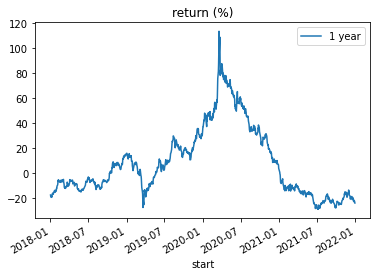

In [109]:
_ = df_result.set_index('start').loc[:,'return'].rename('1 year').plot(title='return (%)', legend=True)

In [105]:
df_result.set_index('start').loc[:,'return'].rename('1 year')

start
2018-01-02   -17.645581
2018-01-03   -18.957395
2018-01-04   -19.063448
2018-01-05   -19.569354
2018-01-08   -18.930205
                ...    
2021-12-24   -22.951085
2021-12-27   -22.339628
2021-12-28   -22.429289
2021-12-29   -23.206085
2021-12-30   -24.067627
Name: 1 year, Length: 986, dtype: float64

## SC02

In [156]:
n_buy = 10

kwargs.update({
    'buy_prop': 1/n_buy,
})

time: 1.1 ms (started: 2023-02-18 23:32:47 +09:00)


In [137]:
(df_bt.groupby(df_bt.index.month)['close'].count()/5).mean()

20.53333333333333

time: 17 ms (started: 2023-02-18 23:21:34 +09:00)


In [157]:
period = 20

time: 840 µs (started: 2023-02-18 23:33:46 +09:00)


In [210]:
df_result = pd.DataFrame(columns=['start', 'end', 'init', 'final', 'return'])
print_step = 0.1
n_last = 0

for i, start in enumerate(dates):
#for i, start in enumerate(dates[[180,181]]):
    
    df_bt['custom'] = 0 # reset
    dt = dates[[i + x*period for x in range(n_buy)]]
    df_bt.loc[dt,'custom'] = -1
    
    df = {symbol: df_bt}
    end = start + timedelta(hold_period)
    with HiddenPrints(mark_end=False):
        result = backtest_portfolio('custom', df, start.strftime(DT_FORMAT), end.strftime(DT_FORMAT), **kwargs)
    df_result.loc[i] = [start, end] + result['summary']
    
    n = round((i+1) / n_dates * 100)
    if n != n_last and n % (print_step*100) == 0:
        print(f'{n} % done')
        n_last = n
    
    #if i > 20:
    if False:
    #if True:
        break

10 % done
20 % done
30 % done
40 % done
50 % done
60 % done
70 % done
80 % done


IndexError: index 986 is out of bounds for axis 0 with size 986

time: 10min 23s (started: 2023-02-19 00:13:36 +09:00)


In [211]:
dates

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-24', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=986, freq=None)

time: 21.2 ms (started: 2023-02-19 00:24:42 +09:00)


In [ ]:
_ = df_result.set_index('start').loc[:,'return'].rename('1 year').plot(title='return (%)', legend=True)

In [208]:
start, end

(Timestamp('2018-09-28 00:00:00'), Timestamp('2019-09-28 00:00:00'))

time: 8.82 ms (started: 2023-02-19 00:12:09 +09:00)


In [189]:
df = {symbol: df_bt}
end = start + timedelta(hold_period)
with HiddenPrints(mark_end=False):
    result = backtest_portfolio('custom', df, start.strftime(DT_FORMAT), end.strftime(DT_FORMAT), **kwargs)

(Timestamp('2021-12-30 00:00:00'), Timestamp('2022-12-30 00:00:00'))

time: 16.6 ms (started: 2023-02-18 23:58:46 +09:00)
